# Housing Price Prediction Using Linear Regression

This notebook performs a comprehensive linear regression analysis on the `HousingData.csv` dataset. The analysis follows these steps:

- **Data Preparation**: Collection, cleaning, feature selection, and data splitting.
- **Model Development**: Linear regression training and evaluation.
- **Model Analysis**: Performance evaluation and residual analysis.
- **Interpretation and Reporting**: Interpretation of coefficients, visualizations, and limitations.

Each step is accompanied by detailed explanations and the respective code.

## Step 1: Data Preparation
### 1.1 Data Collection
We start by loading the `HousingData.csv` dataset into a pandas DataFrame for analysis. The dataset is assumed to be in the same directory as this notebook.

In [3]:

import pandas as pd
import numpy as np

# Load the dataset
file_path = "HousingData.csv"
housing_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
housing_data.head()
    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### 1.2 Data Cleaning
In this step, we:
- Handle missing values by imputing them with the median of each column.
- Detect and address outliers by capping values at the 5th and 95th percentiles.
This ensures the dataset is consistent and suitable for regression analysis.

In [5]:

# Handle missing values by imputing with the median
housing_data = housing_data.fillna(housing_data.median())

# Cap outliers at the 5th and 95th percentiles
for col in housing_data.columns:
    lower_bound = housing_data[col].quantile(0.05)
    upper_bound = housing_data[col].quantile(0.95)
    housing_data[col] = np.clip(housing_data[col], lower_bound, upper_bound)
    

### 1.3 Feature Selection
Correlation analysis is used to identify features strongly correlated with the target variable `MEDV`. Only features with an absolute correlation above 0.5 are selected.

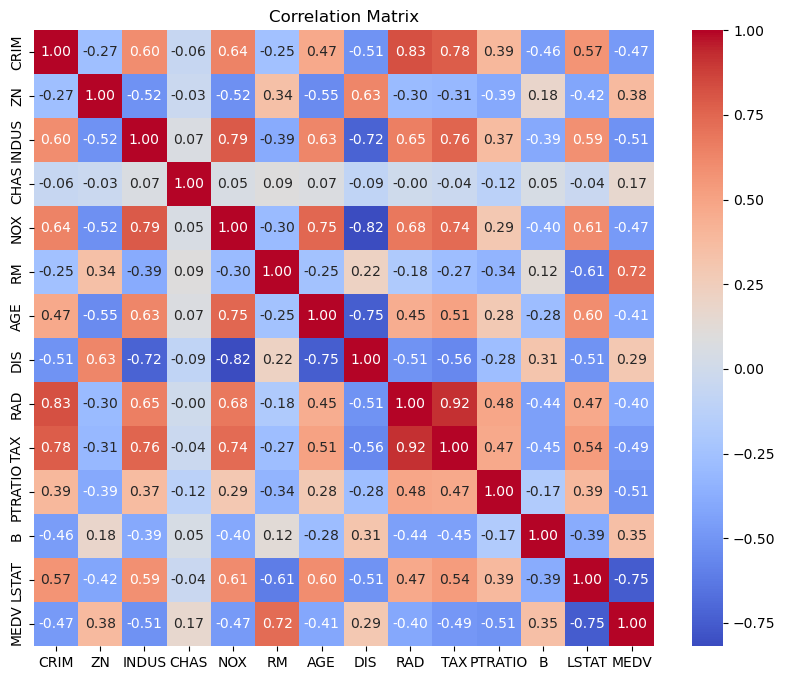

Index(['INDUS', 'RM', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation analysis
correlation_matrix = housing_data.corr()
relevant_features = correlation_matrix['MEDV'][abs(correlation_matrix['MEDV']) > 0.5].index

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

relevant_features
    

### 1.4 Data Splitting
The dataset is split into training (70%) and testing (30%) sets. The selected features are used as predictors, and `MEDV` is the target variable.

In [9]:

from sklearn.model_selection import train_test_split

# Split the data
X = housing_data[relevant_features.drop('MEDV')]  # Independent variables
y = housing_data['MEDV']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    

## Step 2: Model Development
### 2.1 Linear Regression Training
The linear regression model is trained using the training data. Coefficients and the intercept are calculated.

In [11]:

from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Retrieve coefficients and intercept
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

coefficients, intercept
    

(INDUS     -0.031565
 RM         5.563550
 PTRATIO   -0.774371
 LSTAT     -0.585264
 dtype: float64,
 9.39707997251242)

### 2.2 Model Evaluation
The model is evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared metrics. These metrics help assess the model's accuracy and predictive power.

In [13]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

mse, mae, r_squared
    

(18.96419270758441, 3.220448730622721, 0.6866475583815222)

## Step 3: Model Analysis
### 3.1 Residual Analysis
Residuals (differences between predicted and actual values) are analyzed to validate model assumptions. Plots of residuals against predictions and their distribution are provided.

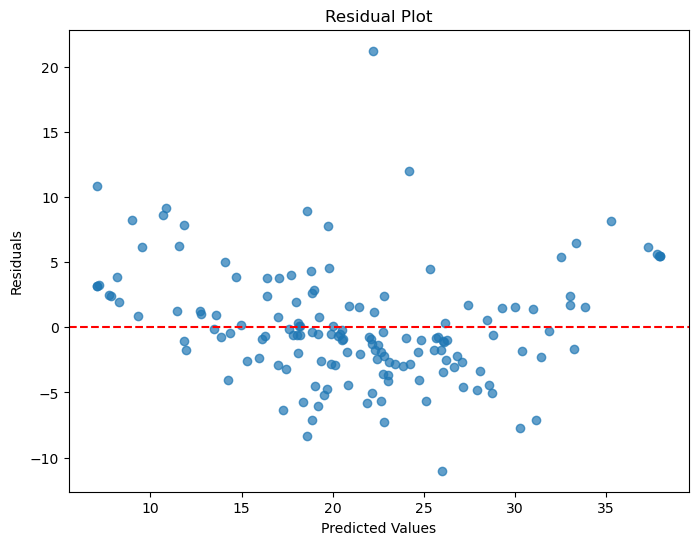

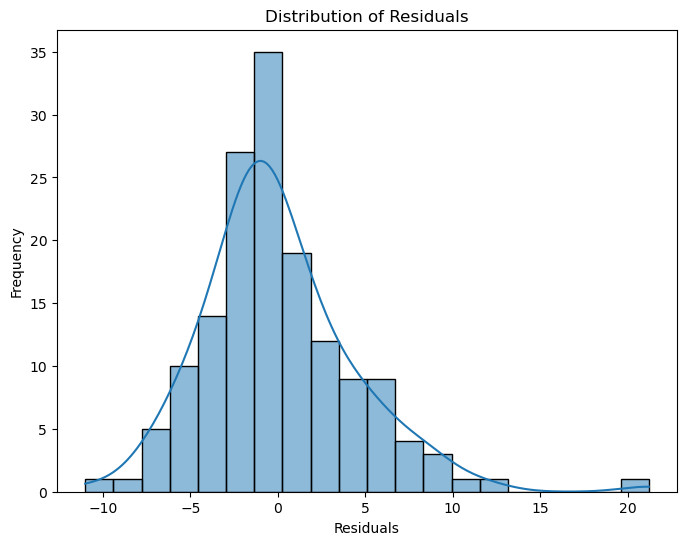

In [15]:

# Residual analysis
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
    

## Step 4: Interpretation and Reporting
### 4.1 Interpretation of Coefficients
Each coefficient represents the effect of the respective independent variable on the target (`MEDV`):
- **Positive Coefficients**: Increase in the variable increases the target value.
- **Negative Coefficients**: Increase in the variable decreases the target value.

### 4.2 Visualizations
Scatter plots with regression lines illustrate the relationships between the selected features and the target variable.

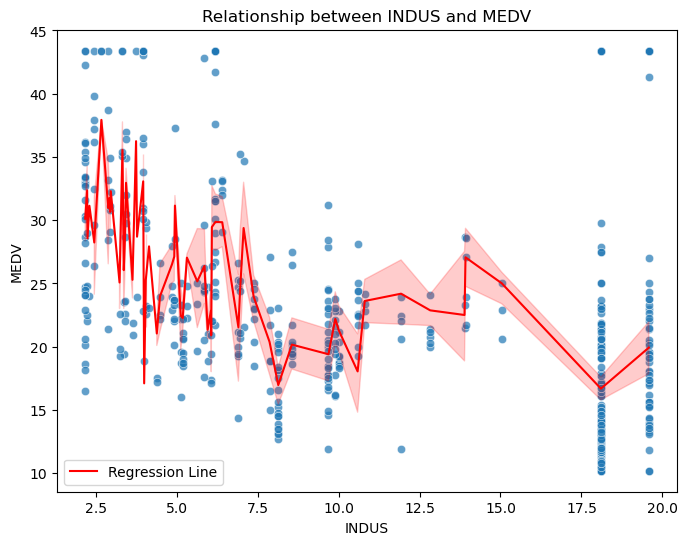

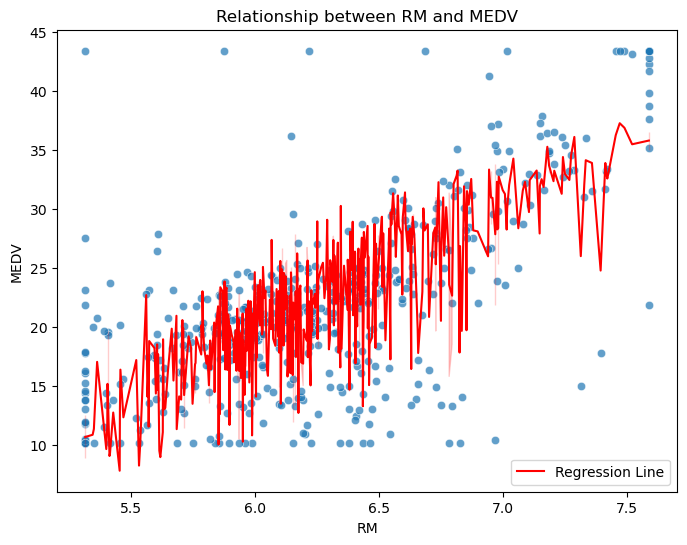

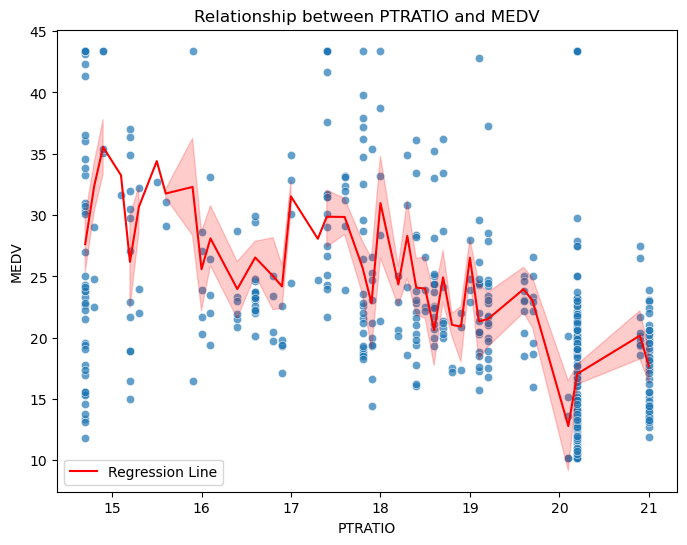

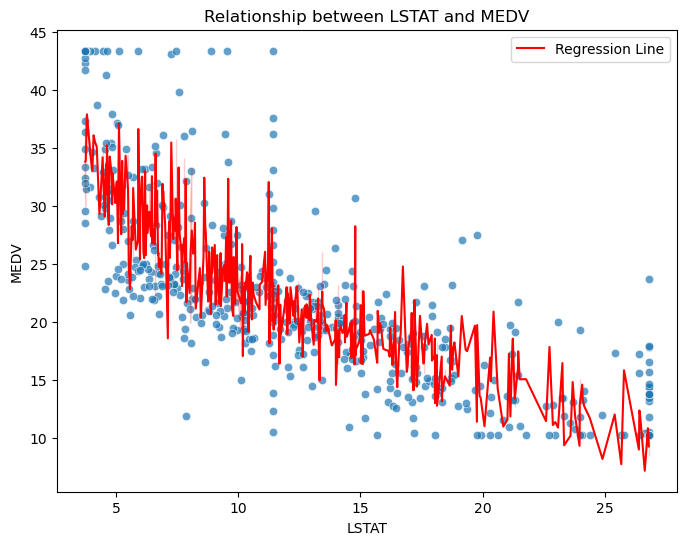

In [18]:

# Visualize relationships
for feature in relevant_features.drop('MEDV'):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=housing_data[feature], y=housing_data['MEDV'], alpha=0.7)
    sns.lineplot(x=housing_data[feature],
                 y=model.predict(housing_data[relevant_features.drop('MEDV')]),
                 color='red', label='Regression Line')
    plt.title(f"Relationship between {feature} and MEDV")
    plt.xlabel(feature)
    plt.ylabel("MEDV")
    plt.legend()
    plt.show()
    

### 4.3 Model Limitations
- **Linear Assumption**: The model assumes a linear relationship, which might not fully capture complex patterns.
- **Outliers**: Some residual outliers may still influence predictions.
- **Feature Interaction**: The model does not account for interactions between independent variables.
- **External Factors**: Other unmeasured factors might affect housing prices.